In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle as cPickle
import pandas as pd
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.layers import LSTM, Dense, TimeDistributed, Bidirectional
import sklearn.metrics
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import concatenate
from tensorflow.keras import Model
from keras.layers import Dense,Embedding,LSTM,Dropout,Bidirectional
from keras import models

In [ ]:
data_student = "/content/drive/MyDrive/KD2_Predict_ArapUbi/Data/Data for Student/"

path_model = "/content/drive/MyDrive/KD2_Predict_ArapUbi/Model/"
path_result = "/content/drive/MyDrive/KD2_Predict_ArapUbi/Result/"

In [ ]:
def twoTupleDic3():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        for j in AA_list_sort:
          for jj in AA_list_sort:
             AA_dict[i+j+jj] = numm
             numm += 1
    return AA_dict
def twoTupleDic2():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        for j in AA_list_sort:
          AA_dict[i+j] = numm
          numm += 1
    return AA_dict

def twoTupleDic1():
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        AA_dict[i] = numm
        numm += 1
    return AA_dict
def ProSentence(pro, K):
	sentence = ""
	length = len(pro)
	for i in range(length - K + 1):
		sentence += pro[i: i + K] + " "
    #delete extra space
	sentence = sentence[0 : len(sentence) - 1]
	return sentence
k =1#1-gram
word_index1 = twoTupleDic1()
vocab_size = len(word_index1)
num_folds = 5
TIME_STEPS = 33
INPUT_SIZE = 300

In [ ]:
# load test data for student
file_test_student ="test_data_31_Arathailiana_1_1.csv"
df_test_student =pd.read_csv(data_student+file_test_student,delimiter= ',')
text_test_student =[] #PTMsequend kmer
for i in df_test_student['Sequence']:
  temp = ProSentence(i,k)
  text_test_student.append(temp)
df_test_student['k_mer'] =text_test_student

test_sequences_student = []
for each in text_test_student:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences_student.append(each_index_list)

data_token_student = []
for i in df_test_student['k_mer']:
   data_token_student.append(i.split())
MAX_SEQUENCE_LENGTH_student = len(data_token_student[1])

Xtest_student = pad_sequences(test_sequences_student, maxlen=MAX_SEQUENCE_LENGTH_student)
ytest_student = np.array(df_test_student['Label'])
# perform one-hot encoding on the labels
ytest_student = np.array(ytest_student)
lb = LabelBinarizer()
ytest_student= lb.fit_transform(ytest_student)
ytest_student = to_categorical(ytest_student)
ytest_student.shape

(1022, 2)

In [ ]:
from keras import models
model_KD1 = models.load_model(path_model +"KD1_1gram.h5")
y_prob_KD1 = model_KD1.predict(Xtest_student)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

32/32 [==============================] - 1s 20ms/step


In [ ]:
from keras import models
model_KD2 = models.load_model(path_model +"KD2_1gram.h5")
y_prob_KD2 = model_KD2.predict(Xtest_student)
#pd.DataFrame(y_prob_KD2[:,1], columns=['KD2_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

In [ ]:
from keras import models
model_KD3 = models.load_model(path_model +"KD3_1gram.h5")
y_prob_KD3 = model_KD3.predict(Xtest_student)
#pd.DataFrame(y_prob_KD3[:,1])#, columns=['KD3_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

In [ ]:
from keras import models
model_KD4 = models.load_model(path_model +"KD4_1gram.h5")
y_prob_KD4 = model_KD4.predict(Xtest_student)
#pd.DataFrame(y_prob_KD4[:,1], columns=['KD4_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

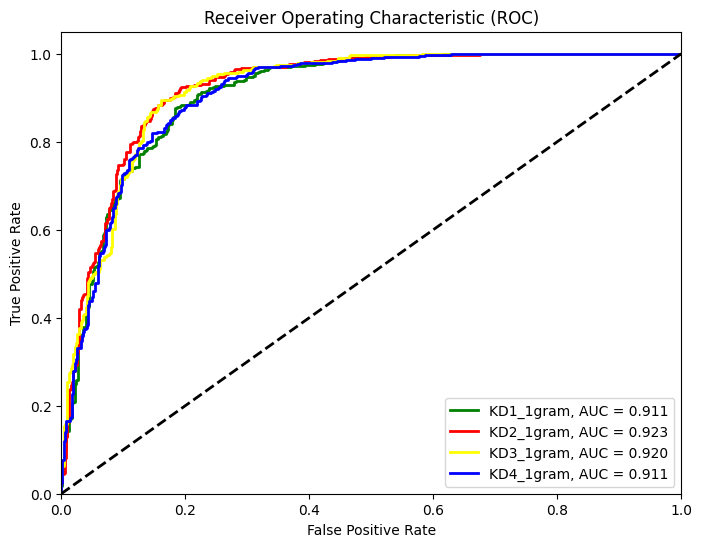

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from keras import models
from sklearn import metrics
# Generate some sample data (replace this with your actual data)
# Assuming y_true and y_pred are your true labels and predicted probabilities respectively


y_true=ytest_student[:,1]

# Calculate ROC curve and AUC for KD1
fpr_KD1, tpr_KD1, thresholds_KD1  = metrics.roc_curve(y_true, y_prob_KD1[:,1])
roc_auc_KD1 = auc(fpr_KD1, tpr_KD1)

# Calculate ROC curve and AUC for KD2
fpr_KD2, tpr_KD2, thresholds_KD2  = metrics.roc_curve(y_true, y_prob_KD2[:,1])
roc_auc_KD2 = auc(fpr_KD2, tpr_KD2)

# Calculate ROC curve and AUC for KD3
fpr_KD3, tpr_KD3, thresholds_KD3  = metrics.roc_curve(y_true, y_prob_KD3[:,1])
roc_auc_KD3 = auc(fpr_KD3, tpr_KD3)

# Calculate ROC curve and AUC for KD4
fpr_KD4, tpr_KD4, thresholds_KD4  = metrics.roc_curve(y_true, y_prob_KD4[:,1])
roc_auc_KD4 = auc(fpr_KD4, tpr_KD4)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_KD1, tpr_KD1, color='green', lw=2, label='KD1_1gram, AUC = {:.3f}'.format(roc_auc_KD1))
plt.plot(fpr_KD2, tpr_KD2, color='red', lw=2, label='KD2_1gram, AUC = {:.3f}'.format(roc_auc_KD2))
plt.plot(fpr_KD3, tpr_KD3, color='yellow', lw=2, label='KD3_1gram, AUC = {:.3f}'.format(roc_auc_KD3))
plt.plot(fpr_KD4, tpr_KD4, color='blue', lw=2, label='KD4_1gram, AUC = {:.3f}'.format(roc_auc_KD4))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()